In [65]:
import numpy as np
import matplotlib.pyplot as plt

import subprocess
import sys
import os


In [66]:
# Poner la ruta donde esté el directorio "final_FCII_25_1"

os.chdir("/home/santiago/santiago_FCII_20251/004_EstudiantesFC2/EntregasEstudiantes/Julio_45/final_FCII_25_1")

In [67]:
T0 = 2.3482233139345615e-13
TCMB = T0*1091

## WIMPs

In [68]:
MS = 10.
sigmav = 1e-10
TR = 1e6
model = "WIMP"
DMini = 2
DMfin = 0
SMfin = 2

In [69]:
subprocess.run(f"make clean && make && ./bin/main.out {MS} {sigmav} {TR} " + model + f" {DMini} {DMfin} {SMfin} > data/output.dat",shell=True,
    check=True)

rm -rf build bin
mkdir -p build
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/boltzmannEq.cpp -o build/boltzmannEq.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/cosmologia.cpp -o build/cosmologia.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/DMmodel.cpp -o build/DMmodel.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/secante.cpp -o build/secante.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/solver.cpp -o build/solver.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/writer.cpp -o build/writer.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c main.cpp -o build/main.o


main.cpp: In function ‘int main(int, char**)’:
main.cpp:8:14: warning: unused parameter ‘argc’ [-Wunused-parameter]
    8 | int main(int argc, char *argv []){
      |          ~~~~^~~~


mkdir -p bin
g++ -Wall -Wextra -std=c++17 -Iinclude build/boltzmannEq.o build/cosmologia.o build/DMmodel.o build/secante.o build/solver.o build/writer.o build/main.o -o bin/main.out


CompletedProcess(args='make clean && make && ./bin/main.out 10.0 1e-10 1000000.0 WIMP 2 0 2 > data/output.dat', returncode=0)

In [70]:
data = np.loadtxt('/home/santiago/santiago_FCII_20251/004_EstudiantesFC2/EntregasEstudiantes/Julio_45/final_FCII_25_1/data/solution.txt')

xs = data[:,0]
Ts = data[:,1]
Ys = data[:,2]
Yeqs = data[:,3]
geff = data[:,4]
heff = data[:,5]
rhos = data[:,6]
ss = data[:,7]
Hs = data[:,8]

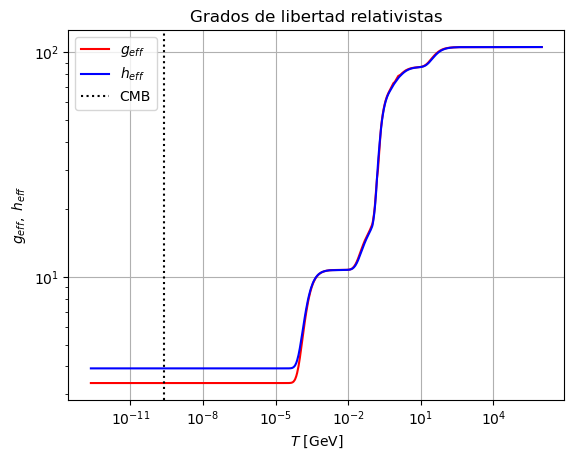

In [71]:
plt.loglog(Ts,geff,'r',label=r'$g_{eff}$')
plt.loglog(Ts,heff,'b',label=r'$h_{eff}$')
plt.axvline(TCMB,color='k',linestyle=':',label='CMB')
plt.xlabel(r'$T$ [GeV]')
plt.ylabel(r'$g_{eff},~h_{eff}$')
plt.title('Grados de libertad relativistas')
plt.legend()
plt.grid()
plt.savefig('python/gdlr.png')
plt.show()

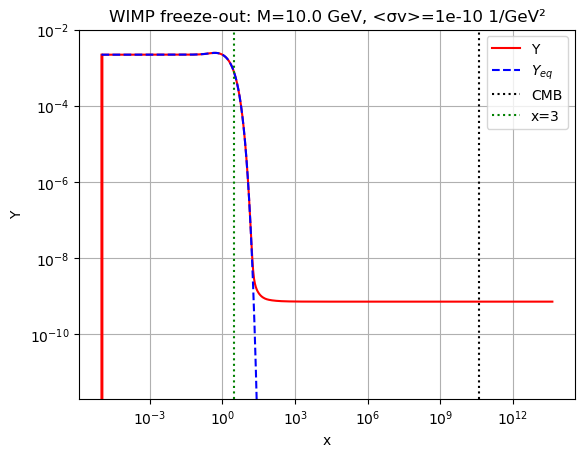

In [72]:
plt.loglog(xs,Ys,'r',label='Y')
plt.loglog(xs,Yeqs,'b--',label=r'$Y_{eq}$')
plt.axvline(MS/TCMB,color='k',linestyle=':',label='CMB')
plt.axvline(3,color='g',linestyle=':',label='x=3')
plt.ylim(2e-12,1e-2)
plt.title(f'WIMP freeze-out: M={MS} GeV, <σv>={sigmav} 1/GeV²')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.savefig('python/wimp.png')


## FIMPs

In [73]:
MS = 10.
sigmav = 1e-24
TR = 100
model = "FIMP"
DMini = 0
DMfin = 2
SMfin = 0

In [74]:
subprocess.run(f"make clean && make && ./bin/main.out {MS} {sigmav} {TR} " + model + f" {DMini} {DMfin} {SMfin} > data/output.dat",shell=True,
    check=True)

rm -rf build bin
mkdir -p build
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/boltzmannEq.cpp -o build/boltzmannEq.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/cosmologia.cpp -o build/cosmologia.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/DMmodel.cpp -o build/DMmodel.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/secante.cpp -o build/secante.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/solver.cpp -o build/solver.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/writer.cpp -o build/writer.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c main.cpp -o build/main.o


main.cpp: In function ‘int main(int, char**)’:
main.cpp:8:14: warning: unused parameter ‘argc’ [-Wunused-parameter]
    8 | int main(int argc, char *argv []){
      |          ~~~~^~~~


mkdir -p bin
g++ -Wall -Wextra -std=c++17 -Iinclude build/boltzmannEq.o build/cosmologia.o build/DMmodel.o build/secante.o build/solver.o build/writer.o build/main.o -o bin/main.out


CompletedProcess(args='make clean && make && ./bin/main.out 10.0 1e-24 100 FIMP 0 2 0 > data/output.dat', returncode=0)

In [75]:
data = np.loadtxt('/home/santiago/santiago_FCII_20251/004_EstudiantesFC2/EntregasEstudiantes/Julio_45/final_FCII_25_1/data/solution.txt')

xs = data[:,0]
Ts = data[:,1]
Ys = data[:,2]
Yeqs = data[:,3]
geff = data[:,4]
heff = data[:,5]
rhos = data[:,6]
ss = data[:,7]
Hs = data[:,8]

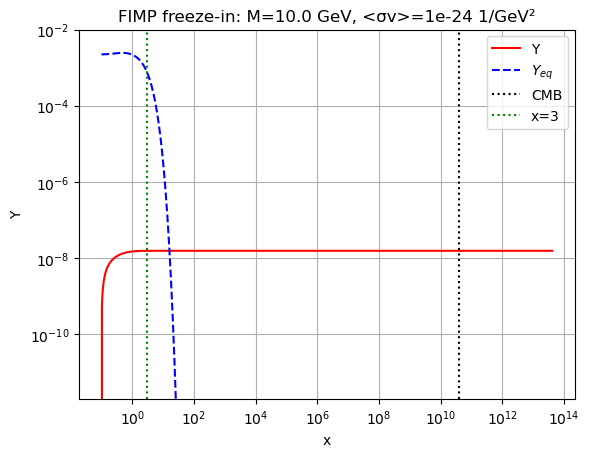

In [76]:
plt.loglog(xs,Ys,'r',label='Y')
plt.loglog(xs,Yeqs,'b--',label=r'$Y_{eq}$')
plt.axvline(MS/TCMB,color='k',linestyle=':',label='CMB')
plt.axvline(3,color='g',linestyle=':',label='x=3')
plt.ylim(2e-12,1e-2)
plt.title(f'FIMP freeze-in: M={MS} GeV, <σv>={sigmav} 1/GeV²')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.savefig('python/fimp.png')


## SIMPs

In [77]:
MS = 1.
sigmav = 1e3
TR = 1e6
model = "SIMP"
DMini = 3
DMfin = 2
SMfin = 0

In [78]:
subprocess.run(f"make clean && make && ./bin/main.out {MS} {sigmav} {TR} " + model + f" {DMini} {DMfin} {SMfin} > data/output.dat",shell=True,
    check=True)

rm -rf build bin
mkdir -p build
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/boltzmannEq.cpp -o build/boltzmannEq.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/cosmologia.cpp -o build/cosmologia.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/DMmodel.cpp -o build/DMmodel.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/secante.cpp -o build/secante.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/solver.cpp -o build/solver.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c src/writer.cpp -o build/writer.o
g++ -Wall -Wextra -std=c++17 -Iinclude -c main.cpp -o build/main.o


main.cpp: In function ‘int main(int, char**)’:
main.cpp:8:14: warning: unused parameter ‘argc’ [-Wunused-parameter]
    8 | int main(int argc, char *argv []){
      |          ~~~~^~~~


mkdir -p bin
g++ -Wall -Wextra -std=c++17 -Iinclude build/boltzmannEq.o build/cosmologia.o build/DMmodel.o build/secante.o build/solver.o build/writer.o build/main.o -o bin/main.out


CompletedProcess(args='make clean && make && ./bin/main.out 1.0 1000.0 1000000.0 SIMP 3 2 0 > data/output.dat', returncode=0)

In [79]:
data = np.loadtxt('/home/santiago/santiago_FCII_20251/004_EstudiantesFC2/EntregasEstudiantes/Julio_45/final_FCII_25_1/data/solution.txt')

xs = data[:,0]
Ts = data[:,1]
Ys = data[:,2]
Yeqs = data[:,3]
geff = data[:,4]
heff = data[:,5]
rhos = data[:,6]
ss = data[:,7]
Hs = data[:,8]

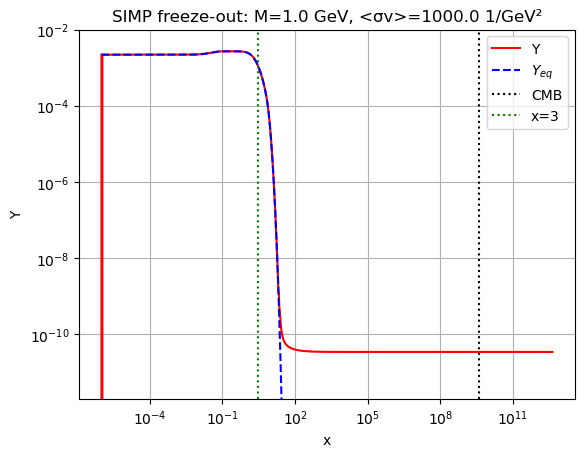

In [80]:
plt.loglog(xs,Ys,'r',label='Y')
plt.loglog(xs,Yeqs,'b--',label=r'$Y_{eq}$')
plt.axvline(MS/TCMB,color='k',linestyle=':',label='CMB')
plt.axvline(3,color='g',linestyle=':',label='x=3')
plt.ylim(2e-12,1e-2)
plt.title(f'SIMP freeze-out: M={MS} GeV, <σv>={sigmav} 1/GeV²')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.savefig('python/simp.png')
